<a href="https://colab.research.google.com/github/Sreraj/NLP-Projects/blob/main/NLP_twitter_Sentimental_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("/content/twitter_validation.csv",header=None,encoding='ISO_8859-1')
df.columns = ['Id','Social Media','Target','Review_text']
df

,Id,Social Media,Target,Review_text
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...
...,...,...,...,...
995,4891,GrandTheftAuto(GTA),Irrelevant,â­ï¸ Toronto is the arts and culture capital...
996,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
997,2652,Borderlands,Positive,Today sucked so itâs time to drink wine n pl...
998,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [ ]:
df.head()

,Id,Social Media,Target,Review_text
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...


In [ ]:
df.tail()

,Id,Social Media,Target,Review_text
995,4891,GrandTheftAuto(GTA),Irrelevant,â­ï¸ Toronto is the arts and culture capital...
996,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
997,2652,Borderlands,Positive,Today sucked so itâs time to drink wine n pl...
998,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.
999,6960,johnson&johnson,Neutral,Johnson & Johnson to stop selling talc baby po...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Id            1000 non-null   int64 
 1   Social Media  1000 non-null   object
 2   Target        1000 non-null   object
 3   Review_text   1000 non-null   object
dtypes: int64(1), object(3)
memory usage: 31.4+ KB


In [ ]:
df.isna().sum()

,0
Id,0
Social Media,0
Target,0
Review_text,0


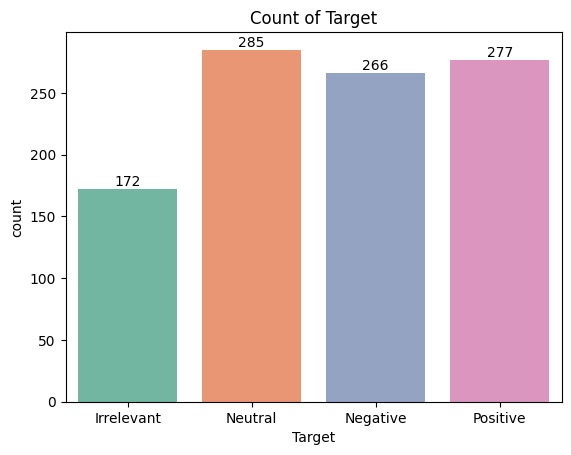

In [ ]:
# Count of Target
ax = sns.countplot(x='Target',data=df,palette='Set2')
for i in ax.containers:
  ax.bar_label(i)
plt.title("Count of Target")
plt.show()


In [ ]:
df['Social Media'].value_counts()

,count
Social Media,
RedDeadRedemption(RDR),40
johnson&johnson,39
FIFA,38
PlayerUnknownsBattlegrounds(PUBG),38
LeagueOfLegends,37
ApexLegends,36
TomClancysRainbowSix,35
Nvidia,35
GrandTheftAuto(GTA),35


In [ ]:
# Drop irrelevant columns

df.drop(['Id','Social Media'],axis=1,inplace=True)
df

,Target,Review_text
0,Irrelevant,I mentioned on Facebook that I was struggling ...
1,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,Negative,@Microsoft Why do I pay for WORD when it funct...
3,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,Neutral,Now the President is slapping Americans in the...
...,...,...
995,Irrelevant,â­ï¸ Toronto is the arts and culture capital...
996,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
997,Positive,Today sucked so itâs time to drink wine n pl...
998,Positive,Bought a fraction of Microsoft today. Small wins.


In [ ]:
# Drop the irrelevant rows

df.drop(df[df['Target']=='Irrelevant'].index,inplace=True)
df.reset_index(drop=True,inplace=True)
df

,Target,Review_text
0,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,Negative,@Microsoft Why do I pay for WORD when it funct...
2,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,Neutral,Now the President is slapping Americans in the...
4,Negative,Hi @EAHelp Iâve had Madeleine McCann in my c...
...,...,...
823,Negative,Please explain how this is possible! How can t...
824,Positive,Good on Sony. As much as I want to see the new...
825,Positive,Today sucked so itâs time to drink wine n pl...
826,Positive,Bought a fraction of Microsoft today. Small wins.


In [ ]:
df['Target'] = df['Target'].replace({'Positive': 1, 'Negative': -1,"Neutral" :0})      # .map
df

,Target,Review_text
0,0,BBC News - Amazon boss Jeff Bezos rejects clai...
1,-1,@Microsoft Why do I pay for WORD when it funct...
2,-1,"CSGO matchmaking is so full of closet hacking,..."
3,0,Now the President is slapping Americans in the...
4,-1,Hi @EAHelp Iâve had Madeleine McCann in my c...
...,...,...
823,-1,Please explain how this is possible! How can t...
824,1,Good on Sony. As much as I want to see the new...
825,1,Today sucked so itâs time to drink wine n pl...
826,1,Bought a fraction of Microsoft today. Small wins.


In [ ]:
df.dtypes

,0
Target,int64
Review_text,object


In [ ]:
text = df['Review_text']
text

,Review_text
0,BBC News - Amazon boss Jeff Bezos rejects clai...
1,@Microsoft Why do I pay for WORD when it funct...
2,"CSGO matchmaking is so full of closet hacking,..."
3,Now the President is slapping Americans in the...
4,Hi @EAHelp Iâve had Madeleine McCann in my c...
...,...
823,Please explain how this is possible! How can t...
824,Good on Sony. As much as I want to see the new...
825,Today sucked so itâs time to drink wine n pl...
826,Bought a fraction of Microsoft today. Small wins.


In [ ]:
nltk.download('stopwords')
nltk.download('punkt_tab')

# Tokenization

from nltk.tokenize import TweetTokenizer

tk = TweetTokenizer()


text = text.apply(lambda x:' '.join(tk.tokenize(x)))
text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


,Review_text
0,BBC News - Amazon boss Jeff Bezos rejects clai...
1,@Microsoft Why do I pay for WORD when it funct...
2,CSGO matchmaking is so full of closet hacking ...
3,Now the President is slapping Americans in the...
4,Hi @EAHelp Iâ   ve had Madeleine McCann in m...
...,...
823,Please explain how this is possible ! How can ...
824,Good on Sony . As much as I want to see the ne...
825,Today sucked so itâ   s time to drink wine n...
826,Bought a fraction of Microsoft today . Small w...


In [ ]:
# REmoving Special Characters

import re
text = text.str.replace('[^a-zA-Z0-9]',' ',regex=True)   # regex  = regular expression is using beacause of dataframe.
text

,Review_text
0,BBC News Amazon boss Jeff Bezos rejects clai...
1,Microsoft Why do I pay for WORD when it funct...
2,CSGO matchmaking is so full of closet hacking ...
3,Now the President is slapping Americans in the...
4,Hi EAHelp I ve had Madeleine McCann in m...
...,...
823,Please explain how this is possible How can ...
824,Good on Sony As much as I want to see the ne...
825,Today sucked so it s time to drink wine n...
826,Bought a fraction of Microsoft today Small w...


In [ ]:
# collect words length is above 3

text = text.apply(lambda x: ' '.join([i for i in tk.tokenize(x) if len(i)>=3]))
text

,Review_text
0,BBC News Amazon boss Jeff Bezos rejects claims...
1,Microsoft Why pay for WORD when functions poor...
2,CSGO matchmaking full closet hacking truly awf...
3,Now the President slapping Americans the face ...
4,EAHelp had Madeleine McCann cellar for the pas...
...,...
823,Please explain how this possible How can they ...
824,Good Sony much want see the new PS5 what going...
825,Today sucked time drink wine play borderlands ...
826,Bought fraction Microsoft today Small wins


In [ ]:
# Stemming

from nltk.stem import SnowballStemmer
ss = SnowballStemmer(language='english')

text = text.apply(lambda x: ' '.join([ss.stem(i.lower()) for i in tk.tokenize(x)]))
text

,Review_text
0,bbc news amazon boss jeff bezo reject claim co...
1,microsoft whi pay for word when function poor ...
2,csgo matchmak full closet hack truli aw game
3,now the presid slap american the face that rea...
4,eahelp had madelein mccann cellar for the past...
...,...
823,pleas explain how this possibl how can they le...
824,good soni much want see the new ps5 what go ri...
825,today suck time drink wine play borderland unt...
826,bought fraction microsoft today small win


In [ ]:
# Remove Stopwords

from nltk.corpus import stopwords
stop = stopwords.words('english')

text = text.apply(lambda x : ' '.join([i for i in tk.tokenize(x) if i not in stop]))
text

,Review_text
0,bbc news amazon boss jeff bezo reject claim co...
1,microsoft whi pay word function poor samsungus...
2,csgo matchmak full closet hack truli aw game
3,presid slap american face realli commit unlaw ...
4,eahelp madelein mccann cellar past year littl ...
...,...
823,pleas explain possibl let compani overcharg sc...
824,good soni much want see new ps5 go right much ...
825,today suck time drink wine play borderland sun...
826,bought fraction microsoft today small win


In [ ]:
# Vectorization

from sklearn.feature_extraction.text import TfidfVectorizer

vec = TfidfVectorizer()
data = vec.fit_transform(text)
data

<828x3763 sparse matrix of type '<class 'numpy.float64'>'
	with 10461 stored elements in Compressed Sparse Row format>

In [ ]:
data.shape

(828, 3763)

In [ ]:
y = df['Target'].values
y

array([ 0, -1, -1,  0, -1,  1,  1,  1, -1,  1,  1, -1,  0, -1,  1,  1, -1,
        1, -1, -1,  0, -1,  0,  0, -1, -1,  1,  1, -1,  1, -1,  0,  0,  1,
        0,  1,  0,  0,  0,  1,  0, -1, -1, -1,  0,  1, -1, -1,  1,  1,  1,
        1,  1, -1, -1,  1,  1, -1,  0, -1,  0, -1,  1, -1, -1,  1,  1,  1,
        0,  0,  0,  1,  1,  0,  1,  0, -1, -1,  0,  0, -1,  1, -1, -1, -1,
        0,  1,  0, -1,  1,  1,  0,  1,  0,  1, -1,  0,  0,  0, -1,  0, -1,
        0,  0,  1,  1,  0, -1, -1,  1, -1,  0, -1,  1,  0, -1,  0,  1,  0,
        1,  1,  0,  0,  0,  0,  1,  0,  1,  1, -1,  0,  0,  0,  0, -1,  0,
        1, -1,  0, -1,  0, -1, -1, -1,  1,  1,  1,  0,  0,  1,  0,  0,  0,
        1,  0, -1, -1,  0,  1,  1,  0,  1,  1,  0,  0, -1, -1, -1, -1,  1,
        0,  0,  1,  1,  1,  1, -1,  1,  1,  0, -1, -1, -1,  1,  1, -1, -1,
        1,  1, -1,  1,  1, -1,  1,  0, -1,  0,  0,  1, -1,  1,  1,  0,  1,
       -1, -1,  1,  1,  1,  1,  0,  0,  1, -1,  0,  1,  0, -1,  0,  0, -1,
        1,  1, -1,  0,  1

In [ ]:
# MAchine Learning

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(data,y,test_size=0.30,random_state=42)

In [ ]:

# Model Creation
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

knn = KNeighborsClassifier(n_neighbors=7)
nb = MultinomialNB()
sv = SVC()
lr = LogisticRegression()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier(n_estimators=100,n_jobs=1)




In [ ]:

model = [knn,nb,sv,lr,dt,rf]
for i in model:
  print("Model is:",i)
  i.fit(x_train,y_train)
  y_pred = i.predict(x_test)
  print('******************************************************************')
  print("Confusion matrix is : ",confusion_matrix(y_test,y_pred))
  print("Accuracy_score is : ",accuracy_score(y_test,y_pred))
  print("Classification report is : ",classification_report(y_test,y_pred))


Model is: KNeighborsClassifier(n_neighbors=7)
******************************************************************
Confusion matrix is :  [[57 13  9]
 [36 30 13]
 [46 16 29]]
Accuracy_score is :  0.46586345381526106
Classification report is :                precision    recall  f1-score   support

          -1       0.41      0.72      0.52        79
           0       0.51      0.38      0.43        79
           1       0.57      0.32      0.41        91

    accuracy                           0.47       249
   macro avg       0.50      0.47      0.46       249
weighted avg       0.50      0.47      0.45       249

Model is: MultinomialNB()
******************************************************************
Confusion matrix is :  [[42 27 10]
 [14 44 21]
 [15 22 54]]
Accuracy_score is :  0.5622489959839357
Classification report is :                precision    recall  f1-score   support

          -1       0.59      0.53      0.56        79
           0       0.47      0.56      0.51    